## Dependencias 

In [43]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

## Lectura de datos 

In [2]:
datos = pd.read_csv('titanic.csv')
datos.shape

(891, 8)

In [3]:
datos.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Categorizar variables 

In [4]:
varc = ['Age','SibSp','Parch','Fare']
vard = ['Embarked','Pclass','Sex']
target = 'Survived'

## Preparación de datos 

In [8]:
oh = OneHotEncoder(sparse_output=False,drop='if_binary')
oh.fit(datos[vard])


,categories,'auto'
,drop,'if_binary'
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [11]:
varoh = list(oh.get_feature_names_out())
varoh

['Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Embarked_nan',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_male']

In [12]:
datos[varoh] = oh.transform(datos[vard])

In [13]:
datos.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,0,3,male,22.0,1,0,7.2500,S,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,1,1,female,38.0,1,0,71.2833,C,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,1,female,35.0,1,0,53.1000,S,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,3,male,35.0,0,0,8.0500,S,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


## Matriz de características $\mathcal{X}$

In [ ]:
X = datos[varc+varoh].copy()

In [15]:
X

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,38.0,1,0,71.2833,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
887,19.0,0,0,30.0000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
888,NaN,1,2,23.4500,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
889,26.0,0,0,30.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Vector de respuesta: $y$ 

In [16]:
y = datos[target]

## Imputación de datos 

In [22]:
si = SimpleImputer(strategy='median')
si.fit(X)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [23]:
Xi = si.transform(X)

## Aprendizaje automático 

### Partición de datos 

In [36]:
X_train, X_valid, y_train, y_valid = train_test_split(Xi,y,test_size=0.3)
y_train.reset_index(drop=True,inplace=True)
y_valid.reset_index(drop=True,inplace=True)


### Entrenamiento 

In [37]:
lr = LogisticRegression()

In [38]:
lr.fit(X_train,y_train)

/Users/josegustavofuentescabrera/Documents/anahuac/super-duper-octo-disco/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Parámetros del modelo $\theta$

In [41]:
dict(zip(varc+varoh,lr.coef_[0]))

{'Age': np.float64(-0.031357546046959534),
 'SibSp': np.float64(-0.14876841394001367),
 'Parch': np.float64(-0.07670848237976885),
 'Fare': np.float64(0.002541985706502758),
 'Embarked_C': np.float64(0.6223640760250508),
 'Embarked_Q': np.float64(0.34505022036138877),
 'Embarked_S': np.float64(0.15660821050372942),
 'Embarked_nan': np.float64(0.05568064521708775),
 'Pclass_1': np.float64(1.3628362844609896),
 'Pclass_2': np.float64(0.4387083264675269),
 'Pclass_3': np.float64(-0.6218414588212464),
 'Sex_male': np.float64(-2.363069269238691)}

### Asertividad del modelo 

In [44]:
print("train=",roc_auc_score(y_train,lr.predict_proba(X_train)[:,1]))
print("valid=",roc_auc_score(y_valid,lr.predict_proba(X_valid)[:,1]))

train= 0.8467223928370604
valid= 0.8782412965186074


/Users/josegustavofuentescabrera/Documents/anahuac/super-duper-octo-disco/.venv/lib/python3.13/site-packages/sklearn/utils/_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(
/Users/josegustavofuentescabrera/Documents/anahuac/super-duper-octo-disco/.venv/lib/python3.13/site-packages/sklearn/utils/_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


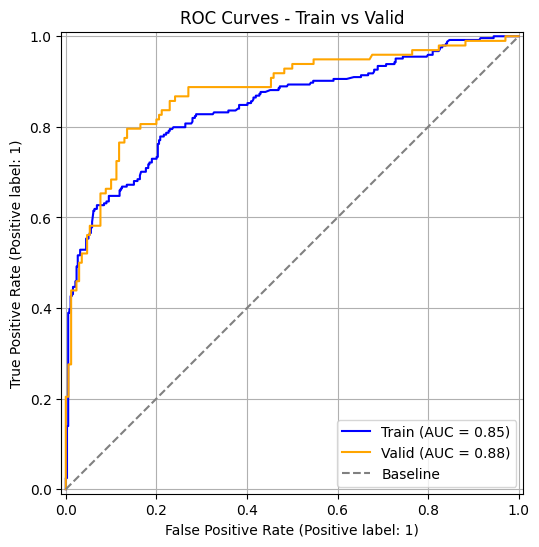

In [46]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))
ax = plt.gca()
RocCurveDisplay.from_estimator(lr, X_train, y_train, name="Train", color="blue", ax=ax)
RocCurveDisplay.from_estimator(lr, X_valid, y_valid, name="Valid", color="orange", ax=ax)

# Baseline (random classifier)
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Baseline')

plt.title("ROC Curves - Train vs Valid")
plt.grid(True)
plt.legend()
plt.show()


## Uso del modelo

In [53]:
aux = pd.DataFrame(lr.predict_proba(X_valid)[:,1],columns=['Probability'])
aux['real'] = y_valid
aux['muestra'] = 'valid'

In [55]:
auxt = pd.DataFrame(lr.predict_proba(X_train)[:,1],columns=['Probability'])
auxt['real'] = y_train
auxt['muestra'] = 'train'

In [56]:
auxt

,Probability,real,muestra
0,0.161657,0,train
1,0.108129,0,train
2,0.938689,1,train
3,0.120604,0,train
4,0.096648,1,train
...,...,...,...
618,0.146400,0,train
619,0.608157,1,train
620,0.066441,1,train
621,0.531386,0,train


In [59]:
score = pd.concat([auxt,aux],ignore_index=True)

In [61]:
score['r_proba'] = pd.cut(score['Probability'],bins=np.arange(0,1.2,0.2),include_lowest=True).astype(str)

In [63]:
score.to_clipboard(index=False)